# Project: Heart_Failure_Prediction

Cardiovascular diseases (CVDs) are the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure. Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Tasks:
1. What age range is more susceptibe to heart failure?
2. Predict heart failure using the best machine learning algorithm.
3. Deploy the machine learning model using Flask.

In [1]:
import pandas as pd

In [2]:
#Loading Data into Pandas DataFrame
heart_data = pd.read_csv('datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#Data Cleaning
columns = heart_data.columns
heart_data.isna().any() #Data looks neat and there are no NaN values.

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

## Exploratory Analysis and Data Visualization
questions:
1. What age range is more susceptible to heart desease?
2. Is there any difference between the number of dead patients and alive patients with high blood pressure? 
3. Which gender is more likely to have heart failure?

In [4]:
#Exploratory Analysis and Data Visualization
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
heart_data_death = heart_data[heart_data['DEATH_EVENT'] == 1] #separating the dataset based on the death event
heart_data_death.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417,1.0
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946,62.378281,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,1.0
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000,25.500000,1.0
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000,44.500000,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000,102.250000,1.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.0


In [6]:
heart_data_alive = heart_data[heart_data['DEATH_EVENT'] == 0]
heart_data_alive.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,58.761906,0.408867,540.054187,0.418719,40.266010,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901,0.0
std,10.637890,0.492840,753.799572,0.494569,10.859963,0.469579,97531.202283,0.654083,3.982923,0.478071,0.469579,67.742872,0.0
min,40.000000,0.000000,30.000000,0.000000,17.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,12.000000,0.0
25%,50.000000,0.000000,109.000000,0.000000,35.000000,0.000000,219500.000000,0.900000,135.500000,0.000000,0.000000,95.000000,0.0
50%,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,263000.000000,1.000000,137.000000,1.000000,0.000000,172.000000,0.0
75%,65.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.200000,140.000000,1.000000,1.000000,213.000000,0.0
max,90.000000,1.000000,5209.000000,1.000000,80.000000,1.000000,850000.000000,6.100000,148.000000,1.000000,1.000000,285.000000,0.0


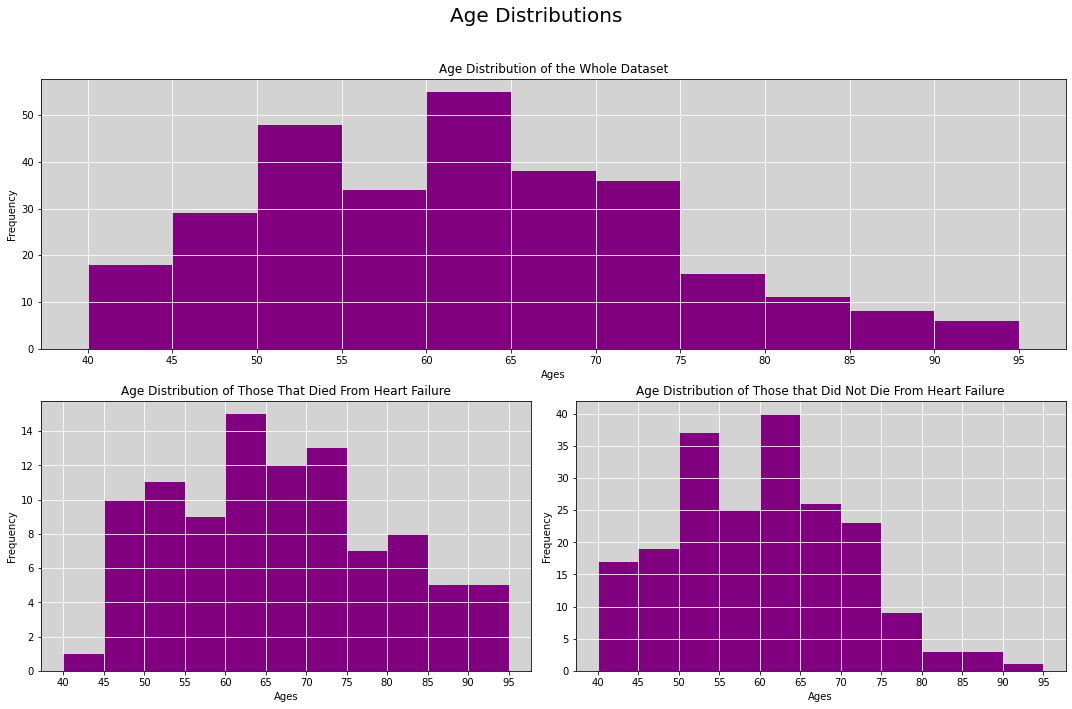

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(heart_data['age'], bins=11, color = 'purple')
ax1.set_xticks(list(range(40, 100, 5)))
ax1.set_xlabel('Ages')
ax1.set_ylabel('Frequency')
ax1.set_title('Age Distribution of the Whole Dataset')
ax1.grid(color = 'w')
ax1.set_facecolor('lightgrey')

ax2 = fig.add_subplot(2, 2, 3)
ax2.hist(heart_data_death['age'], bins=11, range=(40, 95), color = 'purple')
ax2.set_xticks(list(range(40, 100, 5)))
ax2.set_xlabel('Ages')
ax2.set_ylabel('Frequency')
ax2.set_title('Age Distribution of Those That Died From Heart Failure')
ax2.grid(color = 'w')
ax2.set_facecolor('lightgrey')

ax3 = fig.add_subplot(2, 2, 4)
ax3.hist(heart_data_alive['age'], bins=11, range=(40, 95), color = 'purple')
ax3.set_xticks(list(range(40, 100, 5)))
ax3.set_xlabel('Ages')
ax3.set_ylabel('Frequency')
ax3.set_title('Age Distribution of Those that Did Not Die From Heart Failure')
ax3.grid(color = 'w')
ax3.set_facecolor('lightgrey')

fig.suptitle('Age Distributions', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

Figure 1 shows the age distribution of the whole dataset. The figure shows that the patients within the age of 60-65 years had the highest number of deaths due to heart failure. This was probably due to the fact that a large portion of the dataset consists of patients within that age range.

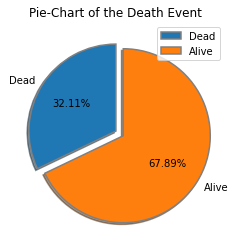

In [8]:
number_of_death = len(heart_data_death['DEATH_EVENT'])
number_alive = len(heart_data_alive['DEATH_EVENT'])


plt.pie([number_of_death, number_alive], autopct='%.2f%%', labels = ['Dead', 'Alive'], 
        explode=(0.0, 0.1), shadow=True, startangle=90, wedgeprops= { 'linewidth' : 1.5, 'edgecolor' : "grey" })
plt.legend()
plt.title('Pie-Chart of the Death Event')
plt.show()

Figure 2 is the pie-chart of death event and it shows that 32.11% of the patients died from heart failure.

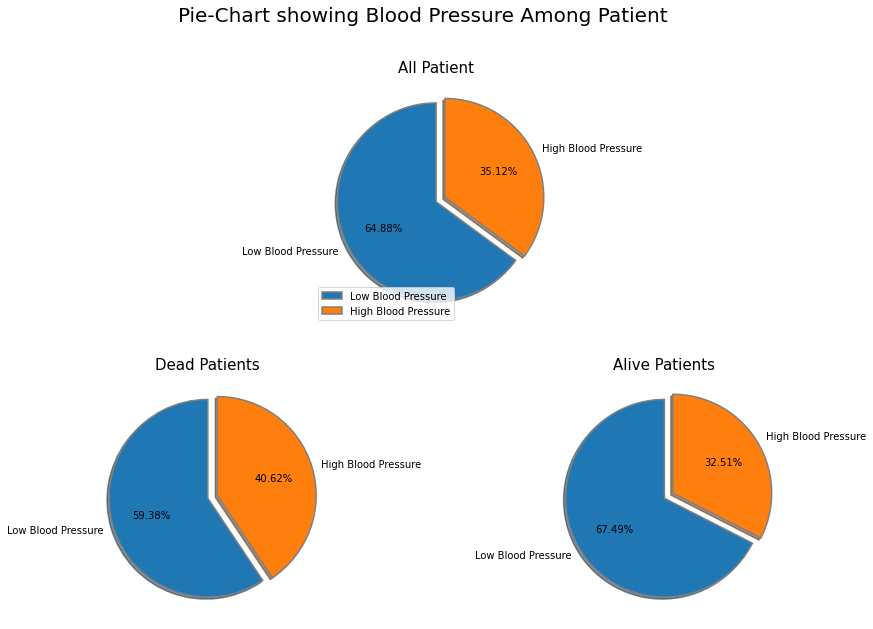

In [9]:
low_bp = len(heart_data[heart_data['high_blood_pressure'] == 0])
high_bp = len(heart_data[heart_data['high_blood_pressure'] == 1])

low_bp_death = len(heart_data_death[heart_data_death['high_blood_pressure'] == 0])
high_bp_death = len(heart_data_death[heart_data_death['high_blood_pressure'] == 1])

low_bp_alive = len(heart_data_alive[heart_data_alive['high_blood_pressure'] == 0])
high_bp_alive = len(heart_data_alive[heart_data_alive['high_blood_pressure'] == 1])

fig_2 = plt.figure(figsize=(15,10))
ax4 = fig_2.add_subplot(2, 1, 1)
ax4.pie([low_bp, high_bp], autopct='%.2f%%', labels = ['Low Blood Pressure', 'High Blood Pressure'], 
        explode=(0.0, 0.1), shadow=True, startangle=90, wedgeprops= { 'linewidth' : 1.5, 'edgecolor' : "grey" })
ax4.set_title('All Patient', fontsize=15)
ax4.legend()

ax5 = fig_2.add_subplot(2, 2, 3)
ax5.pie([low_bp_death, high_bp_death], autopct='%.2f%%', labels = ['Low Blood Pressure', 'High Blood Pressure'], 
        explode=(0.0, 0.1), shadow=True, startangle=90, wedgeprops= { 'linewidth' : 1.5, 'edgecolor' : "grey" })
ax5.set_title('Dead Patients', fontsize=15)

ax6 = fig_2.add_subplot(2, 2, 4)
ax6.pie([low_bp_alive, high_bp_alive], autopct='%.2f%%', labels = ['Low Blood Pressure', 'High Blood Pressure'], 
        explode=(0.0, 0.1), shadow=True, startangle=90, wedgeprops= { 'linewidth' : 1.5, 'edgecolor' : "grey" })
ax6.set_title('Alive Patients', fontsize=15)
fig_2.suptitle('Pie-Chart showing Blood Pressure Among Patient', fontsize=20)

plt.show()

Figure 3 is the pie-chart of blood pressure among the patients which shows that 35.12% of all the patients had high blood pressure. However, 40.62% of the dead patients had high blood pressure and 32.51% of the alive patients had a high blood pressure. The difference is wide and it is safe to conclude that high blood pressure is one of the major factors that cause heart failure.

The ratio of male to female in the whole dataset is: (1.8476190476190477, 1.0)
The ratio of male to female that died from heart failure is: (1.8235294117647058, 1.0)
The ratio of male to female that were alive is: (1.8591549295774648, 1.0)


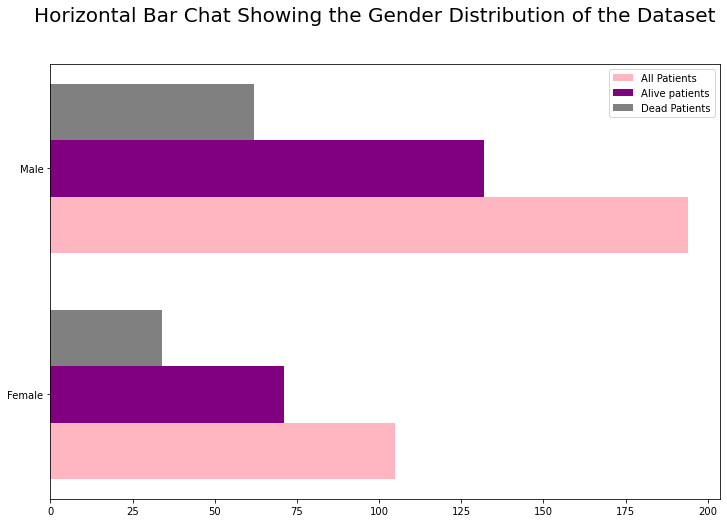

In [14]:
import numpy as np

all_female = len(heart_data[heart_data['sex'] == 0])
all_male = len(heart_data[heart_data['sex'] == 1])
all_ratio = (all_male/all_female, all_female/all_female)

dead_female = len(heart_data_death[heart_data_death['sex'] == 0])
dead_male = len(heart_data_death[heart_data_death['sex'] == 1])
dead_ratio = (dead_male/dead_female, dead_female/dead_female)

alive_female = len(heart_data_alive[heart_data_alive['sex'] == 0])
alive_male = len(heart_data_alive[heart_data_alive['sex'] == 1])
alive_ratio = (alive_male/alive_female, alive_female/alive_female)

print(f'The ratio of male to female in the whole dataset is: {all_ratio}')
print(f'The ratio of male to female that died from heart failure is: {dead_ratio}')
print(f'The ratio of male to female that were alive is: {alive_ratio}')

x_bar = np.arange(2)

fig_3 = plt.figure(figsize=(12, 8))
ax7 = fig_3.add_subplot(1, 1, 1)
ax7.barh(x_bar, [all_female, all_male], height = 0.25, color='lightpink')
ax7.barh(x_bar + 0.25, [alive_female, alive_male], height = 0.25, color='purple')
ax7.barh(x_bar + 0.50, [dead_female, dead_male], height = 0.25, color='grey')
ax7.legend(['All Patients', 'Alive patients', 'Dead Patients'])
ax7.set_yticks([0.25, 1.25])
ax7.set_yticklabels(['Female', 'Male'])
fig_3.suptitle('Horizontal Bar Chat Showing the Gender Distribution of the Dataset', fontsize=20)
plt.show()

Figure 4 shows the gender distribution of the dataset. Overall, the dataset consists of more males than females. There is no significant difference between the gender distibution of the dead and alive patients. Therefore, it is safe to conclude that heart failure affects both gender equally.

## Feature Selection

In [ ]:
#feature Selection
corr = heart_data.corr()
best_corr = corr[abs(corr) > 0.1]['DEATH_EVENT']
best_corr #Selecting features that are best correlated with death event.

## Creating the Training and Test Set

In [9]:
from sklearn.model_selection import train_test_split

#Splitting of Dataset
feature_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
x_values = heart_data[feature_cols]
y_values = heart_data['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state = 1)

## Selecting the Best Maching Learning Algorithm

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Determining the Best Algorithm for predicting this Dataset
def model(x, y, alg):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
    model_fit = alg
    model_fit.fit(x_train, y_train)

    train_accuracy = model_fit.score(x_train, y_train)
    test_accuracy = model_fit.score(x_test, y_test)

    return test_accuracy


forest_lst = []
for i in range(1, 100):
    accuracy = model(x_values, y_values, RandomForestClassifier(n_estimators= i))
    forest_lst.append((i, accuracy))
forest_lst.sort(reverse=True, key = lambda x: x[1])
print(f'Test accuracy for Random_Forest is: {forest_lst[0][1]}')

KNN_lst = []
for i in range(1, 15):
    accuracy = model(x_values, y_values, KNeighborsClassifier(n_neighbors= i))
    KNN_lst.append((i, accuracy))
KNN_lst.sort(reverse = True, key = lambda x: x[1])
print(f'Test accuracy for KNN is: {KNN_lst[0][1]}')

logistic_accuracy = model(x_values, y_values, LogisticRegression())
print(f'Test accuracy for Logitic Regression is: {logistic_accuracy}')

Test accuracy for Random_Forest is: 0.95
Test accuracy for KNN is: 0.9333333333333333
Test accuracy for Logitic Regression is: 0.8833333333333333


In [11]:
#The best algorithm was determined to be the KNeighborsClassifier with n_neighnors=6
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

## Deploying the Model Using Flask

In [12]:
from flask import Flask, render_template, request
import numpy as np

In [ ]:
#Building the Web Application
app = Flask(__name__)
@app.route('/home/<string:name>')
def index(name):
    return f'Hello {name}'
@app.route("/")
def main():
    return render_template("input.html")
@app.route("/result", methods = ['POST'])
def result():
    input_values = list(request.form.values())
    prediction_values = np.array(list(map(int, input_values))).reshape(1, -1)
    prediction = model.predict(prediction_values)
    percent_risk = round((model.predict_proba(prediction_values)[0][1])*100, 2)
    result = f"You have a {percent_risk}% chance of having heart failure"
    return render_template("results.html", prediction=result)
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Sep/2020 00:45:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Sep/2020 00:45:29] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Sep/2020 00:46:10] "GET /home/fayose HTTP/1.1" 200 -
127.0.0.1 - - [06/Sep/2020 00:46:19] "GET /home/Fisayo HTTP/1.1" 200 -
